In [144]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [145]:
data = pd.read_csv('../data/processed/airbnb_features.csv')

In [146]:
data

,log_price,accommodates,bathrooms,cleaning_fee,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,...,zone_2,zone_3,zone_4,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,revie_scores_rating
0,0.318592,-0.072061,-0.561195,1,-1.721916,0,-0.499648,100.0,-0.307531,-0.561195,...,0,0,0,0,0,0,0,1,0,0.678950
1,0.484908,1.785307,1.028378,1,0.631032,1,-0.393909,93.0,2.030826,1.028378,...,0,0,0,0,0,0,0,1,0,0.505392
2,0.271315,0.856623,1.028378,1,0.631032,1,-0.288169,92.0,-0.307531,1.028378,...,1,0,0,0,0,0,0,1,0,0.480598
3,2.562997,0.392281,0.233592,1,-1.721916,0,-0.552518,-1.0,0.861648,0.233592,...,0,0,0,0,0,0,0,0,1,-1.825240
4,-0.051938,-0.536403,-0.561195,1,0.631032,1,-0.446778,40.0,-1.476709,-0.561195,...,0,0,0,0,0,1,0,0,0,-0.808688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,-0.246840,-1.000746,-0.561195,0,-1.721916,0,-0.552518,-1.0,-0.307531,-0.561195,...,0,0,0,0,0,0,0,1,0,-1.825240
74105,0.364318,0.392281,1.823165,1,0.631032,0,-0.129560,93.0,0.861648,1.823165,...,1,0,0,0,0,0,1,0,0,0.505392
74106,0.611053,0.856623,0.233592,1,0.631032,1,0.584183,94.0,0.861648,0.233592,...,0,0,0,0,0,0,0,1,0,0.530186
74107,0.684466,-0.536403,0.233592,1,0.631032,1,-0.552518,-1.0,-1.476709,0.233592,...,0,0,0,0,0,0,0,1,0,-1.825240


Separacion dataset

In [147]:
X = data.drop(columns=["log_price"])
y = data["log_price"]

El dataset tiene muchas variables redudantes por el uso de one-hot encoding. La matriz no es invertible y es necesario qeu lo sea para usar la ecuación normal. Para solucionar esto, vemos la correlacion de las variables.

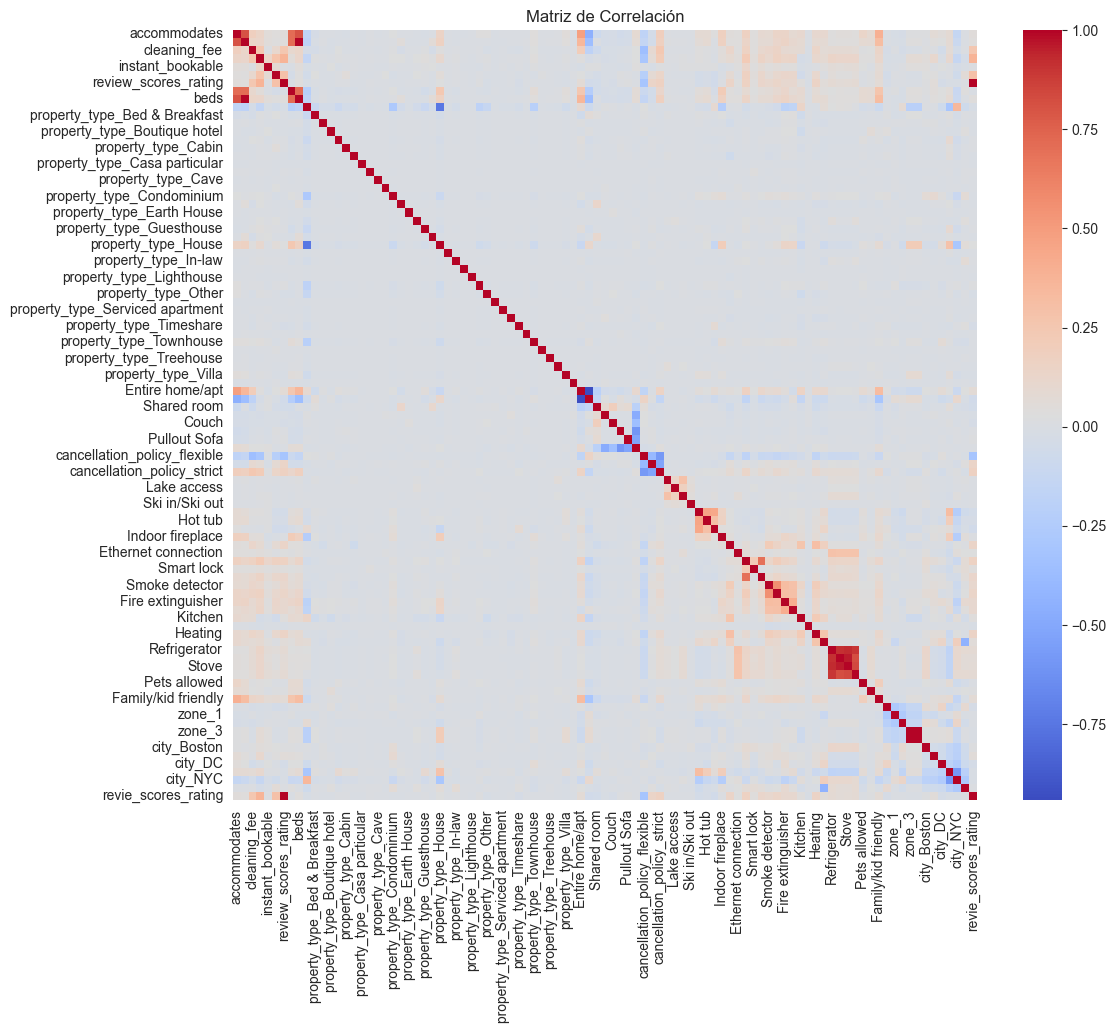

In [148]:
corr_matrix = X.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [149]:
# Seleccionar las columnas con alta correlación
threshold = 0.95
corr_matrix = X.corr().abs()

# Identificar pares de columnas altamente correlacionadas
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar columnas con correlación mayor al umbral
drop_cols = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

print(f"Columnas eliminadas: {drop_cols}")

# Eliminar columnas redundantes
df_reduced = X.drop(columns=drop_cols)


Columnas eliminadas: ['beds', 'Stove', 'zone_4', 'revie_scores_rating']


In [150]:
df_reduced

,accommodates,bathrooms,cleaning_fee,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,property_type_Apartment,property_type_Bed & Breakfast,...,zone_0,zone_1,zone_2,zone_3,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,-0.072061,-0.561195,1,-1.721916,0,-0.499648,100.0,-0.307531,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
1,1.785307,1.028378,1,0.631032,1,-0.393909,93.0,2.030826,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.856623,1.028378,1,0.631032,1,-0.288169,92.0,-0.307531,1.0,0.0,...,0,0,1,0,0,0,0,0,1,0
3,0.392281,0.233592,1,-1.721916,0,-0.552518,-1.0,0.861648,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,-0.536403,-0.561195,1,0.631032,1,-0.446778,40.0,-1.476709,1.0,0.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,-1.000746,-0.561195,0,-1.721916,0,-0.552518,-1.0,-0.307531,1.0,0.0,...,0,1,0,0,0,0,0,0,1,0
74105,0.392281,1.823165,1,0.631032,0,-0.129560,93.0,0.861648,1.0,0.0,...,0,0,1,0,0,0,0,1,0,0
74106,0.856623,0.233592,1,0.631032,1,0.584183,94.0,0.861648,1.0,0.0,...,0,1,0,0,0,0,0,0,1,0
74107,-0.536403,0.233592,1,0.631032,1,-0.552518,-1.0,-1.476709,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [151]:
# Verificar si la matriz es invertible
X_red = df_reduced.to_numpy()
if np.linalg.matrix_rank(X) < X_red.shape[1]:
    print("La matriz sigue siendo singular, hay más columnas de las necesarias.")
else:
    print("La matriz es invertible, puedes usar la ecuación normal.")

La matriz sigue siendo singular, hay más columnas de las necesarias.


In [152]:
# Calcular la varianza de cada columna
varianzas = df_reduced.var()

# Mostrar las columnas con baja varianza (por ejemplo, menor a 0.01)
print(varianzas[varianzas < 0.01])

# Definir umbral de varianza baja
threshold = 0.01

# Filtrar columnas que tienen varianza mayor al umbral
df_reduced_var = df_reduced.loc[:, varianzas > threshold]

print(f"Número de columnas antes: {data.shape[1]}")
print(f"Número de columnas después: {df_reduced_var.shape[1]}")

property_type_Bed & Breakfast       0.006195
property_type_Boat                  0.000876
property_type_Boutique hotel        0.000930
property_type_Bungalow              0.004914
property_type_Cabin                 0.000971
property_type_Camper/RV             0.001267
property_type_Casa particular       0.000013
property_type_Castle                0.000175
property_type_Cave                  0.000027
property_type_Chalet                0.000081
property_type_Dorm                  0.001912
property_type_Earth House           0.000054
property_type_Guest suite           0.001657
property_type_Guesthouse            0.006675
property_type_Hostel                0.000944
property_type_Hut                   0.000108
property_type_In-law                0.000957
property_type_Island                0.000013
property_type_Lighthouse            0.000013
property_type_Other                 0.008124
property_type_Parking Space         0.000013
property_type_Serviced apartment    0.000283
property_t

In [153]:
# Verificar si la matriz es invertible
X = df_reduced_var.to_numpy()
if np.linalg.matrix_rank(X) < X.shape[1]:
    print("La matriz sigue siendo singular, hay más columnas de las necesarias.")
else:
    print("La matriz es invertible, puedes usar la ecuación normal.")

La matriz sigue siendo singular, hay más columnas de las necesarias.


In [154]:
df_reduced_var.shape

(74109, 50)

In [155]:
# Escalar las características antes de PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced_var)  # X = matriz de características sin la columna objetivo

# Aplicar PCA para reducir dimensiones
pca = PCA(n_components=0.95)  # Mantiene el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

In [156]:
X_pca

array([[-0.92691229,  0.38904586,  3.00938594, ..., -0.62894936,
         0.33945186, -0.03256683],
       [ 2.13745664,  0.05417674,  2.47681061, ...,  1.26031574,
        -0.16131211,  0.08522878],
       [ 1.23120011,  0.88040856,  1.66202668, ...,  1.43008825,
         0.22624726,  0.10973001],
       ...,
       [ 2.90274427,  5.69268357,  0.17494084, ..., -1.27789764,
        -0.66807143, -0.88064432],
       [-0.56255045,  0.98269203,  1.87581997, ...,  0.58821299,
        -0.07482101,  0.20760491],
       [ 1.67394429, -0.4289224 , -1.50556856, ...,  0.18887221,
         0.86397964, -1.29369121]], shape=(74109, 38))

Separar en conjuntos de train y test

In [157]:
# Definir la semilla para reproducibilidad
random_seed = 42

# División del dataset (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=random_seed)

# Linear Regression - Normal Equation

Implementación propia

In [158]:
# ----- IMPLEMENTACIÓN PROPIA -----
class NormalEquationLinearRegression:
    def __init__(self):
        self.theta = None  # Parámetros del modelo

    def fit(self, X, y):
        # Agregamos la columna de 1 para el término de sesgo
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

# Entrenar modelo propio
model_custom = NormalEquationLinearRegression()
model_custom.fit(X_train, y_train)
y_pred_custom = model_custom.predict(X_test)

# ----- IMPLEMENTACIÓN CON SKLEARN -----
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)

# ----- EVALUACIÓN DE AMBOS MODELOS -----
def evaluar_modelo(y_true, y_pred, nombre):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Resultados de {nombre}:")
    print(f"  RMSE: {rmse:.5f}")
    print(f"  MAE:  {mae:.5f}")
    print(f"  R²:   {r2:.5f}\n")

evaluar_modelo(y_test, y_pred_custom, "Regresión Normal Equation (Propia)")
evaluar_modelo(y_test, y_pred_sklearn, "Regresión LinearRegression (sklearn)")

Resultados de Regresión Normal Equation (Propia):
  RMSE: 0.64805
  MAE:  0.49164
  R²:   0.57433

Resultados de Regresión LinearRegression (sklearn):
  RMSE: 0.64805
  MAE:  0.49164
  R²:   0.57433



# Linear Regression - SVD

In [159]:
# ----- IMPLEMENTACIÓN PROPIA CON SVD -----
class SVDLinearRegression:
    def __init__(self):
        self.theta = None  # Parámetros del modelo

    def fit(self, X, y):

        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Descomposición SVD
        U, S, Vt = np.linalg.svd(X_b, full_matrices=False)

        # Calculamos theta usando la inversa de S
        S_inv = np.diag(1 / S)
        self.theta = Vt.T @ S_inv @ U.T @ y

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

# Entrenar modelo propio
model_svd_custom = SVDLinearRegression()
model_svd_custom.fit(X_train, y_train)
y_pred_svd_custom = model_svd_custom.predict(X_test)

# ----- IMPLEMENTACIÓN CON SKLEARN -----
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)

# ----- EVALUACIÓN DE AMBOS MODELOS -----
def evaluar_modelo_svd(y_true, y_pred, nombre):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Resultados de {nombre}:")
    print(f"  RMSE: {rmse:.5f}")
    print(f"  MAE:  {mae:.5f}")
    print(f"  R²:   {r2:.5f}\n")

evaluar_modelo_svd(y_test, y_pred_svd_custom, "Regresión Lineal con SVD (Propia)")
evaluar_modelo_svd(y_test, y_pred_sklearn, "Regresión LinearRegression (sklearn)")


Resultados de Regresión Lineal con SVD (Propia):
  RMSE: 0.64805
  MAE:  0.49164
  R²:   0.57433

Resultados de Regresión LinearRegression (sklearn):
  RMSE: 0.64805
  MAE:  0.49164
  R²:   0.57433



# Regresion Polinomial

In [160]:
# ----- IMPLEMENTACIÓN PROPIA -----
class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree
        self.theta = None  # Parámetros del modelo

    def _polynomial_features(self, X):
        """Genera términos polinomiales manualmente."""
        X_poly = np.ones((X.shape[0], 1))  # Agregamos columna de 1s (intercepto)
        for d in range(1, self.degree + 1):
            X_poly = np.c_[X_poly, X ** d]  # Agregamos cada potencia de X
        return X_poly

    def fit(self, X, y):
        X_poly = self._polynomial_features(X)
        # Aplicamos ecuación normal
        self.theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

    def predict(self, X):
        X_poly = self._polynomial_features(X)
        return X_poly.dot(self.theta)

# Definir el grado del polinomio
degree = 2  # Puedes cambiarlo según el problema

# Entrenar modelo propio
model_poly_custom = PolynomialRegression(degree)
model_poly_custom.fit(X_train, y_train)
y_pred_poly_custom = model_poly_custom.predict(X_test)

# ----- IMPLEMENTACIÓN CON SKLEARN -----
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_sklearn = LinearRegression()
model_sklearn.fit(X_train_poly, y_train)
y_pred_poly_sklearn = model_sklearn.predict(X_test_poly)

# ----- EVALUACIÓN DE AMBOS MODELOS -----
def evaluar_modelo_poli(y_true, y_pred, nombre):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Resultados de {nombre}:")
    print(f"  RMSE: {rmse:.5f}")
    print(f"  MAE:  {mae:.5f}")
    print(f"  R²:   {r2:.5f}\n")

evaluar_modelo_poli(y_test, y_pred_poly_custom, "Regresión Polinomial (Propia)")
evaluar_modelo_poli(y_test, y_pred_poly_sklearn, "Regresión Polinomial (sklearn)")

Resultados de Regresión Polinomial (Propia):
  RMSE: 0.63839
  MAE:  0.48250
  R²:   0.58693

Resultados de Regresión Polinomial (sklearn):
  RMSE: 0.57444
  MAE:  0.42710
  R²:   0.66554



# Batch Gradient Descent

In [161]:
# ----- IMPLEMENTACIÓN PROPIA -----
class BatchGradientDescent:
    def __init__(self, alpha=0.01, epochs=1000, tol=1e-6):
        self.alpha = alpha  # Tasa de aprendizaje
        self.epochs = epochs  # Número de iteraciones
        self.tol = tol  # Tolerancia para convergencia
        self.theta = None  # Parámetros del modelo
        self.cost_history = []  # Para almacenar el costo en cada iteración

    def fit(self, X, y):
        y = y.values.reshape(-1, 1)  # Convertir a array 2D de NumPy
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]  # Agregamos columna de 1s para el intercepto
        self.theta = np.random.randn(n + 1, 1)  # Inicializamos theta aleatoriamente

        for epoch in range(self.epochs):
            gradients = (1/m) * X_b.T.dot(X_b.dot(self.theta) - y)
            self.theta -= self.alpha * gradients  # Actualizamos parámetros

            # Calcular costo
            cost = (1/(2*m)) * np.sum((X_b.dot(self.theta) - y)**2)
            self.cost_history.append(cost)

            # Condición de convergencia
            if epoch > 0 and abs(self.cost_history[-1] - self.cost_history[-2]) < self.tol:
                break

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta).flatten()  # Convertir a 1D

# Entrenar modelo propio
model_bgd_custom = BatchGradientDescent(alpha=0.01, epochs=1000)
model_bgd_custom.fit(X_train, y_train)
y_pred_bgd_custom = model_bgd_custom.predict(X_test)

# ----- IMPLEMENTACIÓN CON SKLEARN -----
model_sklearn = SGDRegressor(max_iter=1000, tol=1e-6, learning_rate='constant', eta0=0.01)
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)

# ----- EVALUACIÓN DE AMBOS MODELOS -----
def evaluar_modelo(y_true, y_pred, nombre):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Resultados de {nombre}:")
    print(f"  RMSE: {rmse:.5f}")
    print(f"  MAE:  {mae:.5f}")
    print(f"  R²:   {r2:.5f}\n")

evaluar_modelo(y_test, y_pred_bgd_custom, "Regresión Batch Gradient Descent (Propia)")
evaluar_modelo(y_test, y_pred_sklearn, "Regresión SGDRegressor (sklearn)")

Resultados de Regresión Batch Gradient Descent (Propia):
  RMSE: 0.64796
  MAE:  0.49155
  R²:   0.57445

Resultados de Regresión SGDRegressor (sklearn):
  RMSE: 0.75327
  MAE:  0.57476
  R²:   0.42489



# Stochastic Gradient Descent

In [162]:
# ----- IMPLEMENTACIÓN PROPIA -----
class StochasticGradientDescent:
    def __init__(self, alpha=0.001, epochs=1000, tol=1e-6):
        self.alpha = alpha  # Tasa de aprendizaje
        self.epochs = epochs  # Número de iteraciones
        self.tol = tol  # Tolerancia para convergencia
        self.theta = None  # Parámetros del modelo
        self.cost_history = []  # Para almacenar el costo

    def fit(self, X, y):
        y = y.values.reshape(-1, 1)  # Convertir a array 2D de NumPy
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]  # Agregamos columna de 1s para el intercepto
        self.theta = np.random.randn(n + 1, 1)  # Inicializamos theta aleatoriamente

        for epoch in range(self.epochs):
            for i in range(m):
                random_index = np.random.randint(m)  # Elegimos un índice aleatorio
                xi = X_b[random_index:random_index+1]  # Seleccionamos una muestra
                yi = y[random_index:random_index+1]  # Seleccionamos su etiqueta

                gradients = 2 * xi.T.dot(xi.dot(self.theta) - yi)  # Cálculo del gradiente
                self.theta -= self.alpha * gradients  # Actualizamos parámetros

            # Calcular costo después de cada epoch
            cost = (1/(2*m)) * np.sum((X_b.dot(self.theta) - y)**2)
            self.cost_history.append(cost)

            # Condición de convergencia
            if epoch > 0 and abs(self.cost_history[-1] - self.cost_history[-2]) < self.tol:
                break

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta).flatten()  # Convertir a 1D

# Entrenar modelo propio
model_sgd_custom = StochasticGradientDescent(alpha=0.001, epochs=1000)
model_sgd_custom.fit(X_train, y_train)
y_pred_sgd_custom = model_sgd_custom.predict(X_test)

# ----- IMPLEMENTACIÓN CON SKLEARN -----
model_sklearn = SGDRegressor(max_iter=1000, tol=1e-6, learning_rate='constant', eta0=0.001)
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)

# ----- EVALUACIÓN DE AMBOS MODELOS -----
def evaluar_modelo(y_true, y_pred, nombre):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Resultados de {nombre}:")
    print(f"  RMSE: {rmse:.5f}")
    print(f"  MAE:  {mae:.5f}")
    print(f"  R²:   {r2:.5f}\n")

evaluar_modelo(y_test, y_pred_sgd_custom, "Regresión Stochastic Gradient Descent (Propia)")
evaluar_modelo(y_test, y_pred_sklearn, "Regresión SGDRegressor (sklearn)")


Resultados de Regresión Stochastic Gradient Descent (Propia):
  RMSE: 0.66804
  MAE:  0.51037
  R²:   0.54767

Resultados de Regresión SGDRegressor (sklearn):
  RMSE: 0.65598
  MAE:  0.49873
  R²:   0.56385



# Lasso

In [163]:
# ----- IMPLEMENTACIÓN CON SKLEARN -----
alpha = 0.1  # Hiperparámetro de regularización

model_lasso = Lasso(alpha=alpha, max_iter=1000)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

# ----- EVALUACIÓN DEL MODELO -----
def evaluar_modelo(y_true, y_pred, nombre):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Resultados de {nombre}:")
    print(f"  RMSE: {rmse:.5f}")
    print(f"  MAE:  {mae:.5f}")
    print(f"  R²:   {r2:.5f}\n")

evaluar_modelo(y_test, y_pred_lasso, "Regresión Lasso (sklearn)")


Resultados de Regresión Lasso (sklearn):
  RMSE: 0.72843
  MAE:  0.55186
  R²:   0.46219



# Ridge

In [164]:
# ----- IMPLEMENTACIÓN CON SKLEARN -----
alpha = 1.0  # Hiperparámetro de regularización

model_ridge = Ridge(alpha=alpha)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

# ----- EVALUACIÓN DEL MODELO -----
def evaluar_modelo(y_true, y_pred, nombre):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Resultados de {nombre}:")
    print(f"  RMSE: {rmse:.5f}")
    print(f"  MAE:  {mae:.5f}")
    print(f"  R²:   {r2:.5f}\n")

evaluar_modelo(y_test, y_pred_ridge, "Regresión Ridge (sklearn)")


Resultados de Regresión Ridge (sklearn):
  RMSE: 0.64805
  MAE:  0.49164
  R²:   0.57433



Las conclusiones e interpretación de datos se encuentran en el informe en pdf :)